# Phase 3 Project Submission

Please fill out:
* Student name: Lucas Wilkerson
* Student pace: Flex/part time
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:

# Diabetes Risk Assessment and Prediction

## Project Overview

For this project I sought to develop predictive models to identify individuals who are at higher risk of developing diabetes based on an array of health-related characteristics. Using this data and predictive models, health-care practicioners can improve patient outcomes by improving early diagnosis/ detection and preemptively implementing personalized treatment strategies for treatment and prevention of diabetes.

## Business Problem and Stakeholder

A healthcare practice group is looking to improve diabetes diagnosis, improve prognosis of those who are diagnosed and aid assist patients looking to prevent diabetes. Utilizing this data, providers will be able to look for early detection signs of diabetes and then implement corrective strategies early on in the diesease process to either improve the patients outcome and health with the disease or prevent it altogether. Utilizing my model, the goal is to assist practicioners with early detection by identifying which health-related attributes such as blood pressure, glucose levels, insulin levels, BMI, and age (other afctors: pregnancies, skinfold thickness, diabetes pedigree function) are more predictive or increase the risk of diabetes. 

## Data Understanding

In [1]:
# Importing standard Packages 
import pandas as pd
import numpy as np
import math 

# Importing packages for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing packages for statistics and modeling
import statsmodels.api as sm
import sklearn.metrics as metrics
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import kstest





## Data Preparation/ Preprocessing

In [2]:
# Loading Dataset
diabetes = pd.read_csv('Healthcare-Diabetes.csv')

#Previewing first 5 rows 
diabetes.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Previewing general information on dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [4]:
# Checking for missing values
diabetes.isna().sum()


Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Getting number of patients with and without diabetes
diabetes['Outcome'].value_counts()

0    1816
1     952
Name: Outcome, dtype: int64

In [6]:
# Getting descriptive statistics on dataset 
diabetes.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
#Getting value_counts for whole dataset
for col in diabetes:
        print (diabetes[col].value_counts())

2047    1
1118    1
1134    1
1132    1
1130    1
       ..
461     1
2508    1
459     1
2506    1
2049    1
Name: Id, Length: 2768, dtype: int64
1     491
0     412
2     387
3     270
4     259
5     198
6     181
7     145
8     134
9      98
10     78
11     35
13     32
12     32
14      9
17      4
15      3
Name: Pregnancies, dtype: int64
99     66
100    61
102    52
129    51
106    50
       ..
177     3
62      3
191     3
44      3
198     3
Name: Glucose, Length: 136, dtype: int64
70     201
74     197
78     173
68     170
64     163
72     162
80     138
76     132
60     129
62     128
0      125
82     113
66      95
88      92
84      84
90      77
58      75
86      74
50      44
56      43
54      42
52      40
75      28
65      26
94      24
92      20
85      20
48      18
44      15
106     12
96      12
100     12
98      11
110     10
46       8
108      7
104      7
55       6
61       5
30       5
102      4
122      4
114      4
38       4
40       3
24   

In [8]:
diabetes['BloodPressure'].value_counts()

70     201
74     197
78     173
68     170
64     163
72     162
80     138
76     132
60     129
62     128
0      125
82     113
66      95
88      92
84      84
90      77
58      75
86      74
50      44
56      43
54      42
52      40
75      28
65      26
94      24
92      20
85      20
48      18
44      15
106     12
96      12
100     12
98      11
110     10
46       8
108      7
104      7
55       6
61       5
30       5
102      4
122      4
114      4
38       4
40       3
24       3
95       3
Name: BloodPressure, dtype: int64

In [9]:
diabetes['Glucose'].value_counts()

99     66
100    61
102    52
129    51
106    50
       ..
177     3
62      3
191     3
44      3
198     3
Name: Glucose, Length: 136, dtype: int64

In [10]:
diabetes['BMI'].value_counts()

32.0    46
31.2    45
31.6    41
0.0     39
33.3    37
        ..
39.3     1
19.9     1
45.8     1
31.1     1
43.1     1
Name: BMI, Length: 253, dtype: int64

In [11]:
diabetes['Insulin'].value_counts()

0      1330
105      42
140      33
130      31
180      30
       ... 
846       1
146       1
245       1
543       1
235       1
Name: Insulin, Length: 187, dtype: int64

In [14]:
diabetes['SkinThickness'].value_counts()

0      800
32     114
30     102
23      82
27      81
18      74
28      74
33      71
39      70
31      69
25      63
37      61
29      61
22      60
19      59
40      58
41      56
26      55
17      55
36      52
35      48
15      47
20      45
24      43
42      42
13      41
21      37
46      33
12      28
34      27
38      25
16      21
14      21
43      21
11      20
45      19
10      18
44      17
48      16
49      14
47      11
50      10
8        8
52       6
54       6
7        5
56       4
63       4
51       4
99       3
60       3
110      2
59       2
Name: SkinThickness, dtype: int64

In [12]:
diabetes['DiabetesPedigreeFunction'].value_counts()

0.258    22
0.207    20
0.268    18
0.261    18
0.238    18
         ..
1.441     1
2.288     1
0.201     1
0.851     1
0.546     1
Name: DiabetesPedigreeFunction, Length: 523, dtype: int64

When checking for missing values, the columns of BMI, Blood Pressure, SkinThickness, Glucose and Insulin seem to have some rows with 0 for values. From a human physiology standpoint this wouldn't be feasible so it may be assumed that these 0's indicate not having the measurments for that individual. 

In [13]:
diabetes_2 = diabetes.copy()
diabetes_2 = diabetes_2[diabetes_2['BMI'] >= 1]
diabetes_2 = diabetes_2[diabetes_2['Insulin'] >= 0.1]
diabetes_2 = diabetes_2[diabetes_2['BloodPressure'] >= 1]
diabetes_2 = diabetes_2[diabetes_2['SkinThickness'] >= 1]
diabetes_2 = diabetes_2[diabetes_2['Glucose'] >= 1]

diabetes_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1427 entries, 3 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1427 non-null   int64  
 1   Pregnancies               1427 non-null   int64  
 2   Glucose                   1427 non-null   int64  
 3   BloodPressure             1427 non-null   int64  
 4   SkinThickness             1427 non-null   int64  
 5   Insulin                   1427 non-null   int64  
 6   BMI                       1427 non-null   float64
 7   DiabetesPedigreeFunction  1427 non-null   float64
 8   Age                       1427 non-null   int64  
 9   Outcome                   1427 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 122.6 KB


In [14]:
#Getting value_counts for whole dataset
for col in diabetes_2:
        print (diabetes_2[col].value_counts())

2047    1
596     1
569     1
570     1
2542    1
       ..
1314    1
1315    1
1316    1
1317    1
2049    1
Name: Id, Length: 1427, dtype: int64
1     339
2     243
0     215
3     158
4      98
7      73
5      73
6      65
8      50
9      38
10     20
12     18
11     16
13      9
14      5
17      4
15      3
Name: Pregnancies, dtype: int64
100    51
99     37
129    32
95     30
88     26
       ..
198     3
177     3
164     3
141     3
166     1
Name: Glucose, Length: 117, dtype: int64
74     121
70     106
64     103
68      90
78      89
72      85
60      70
76      69
62      68
58      66
82      63
80      58
88      54
66      44
84      42
86      40
90      38
50      34
54      31
56      30
52      23
44      12
48      11
65       9
94       8
100      8
106      8
46       8
110      7
85       7
30       5
102      4
38       4
92       3
98       3
40       3
24       3
Name: BloodPressure, dtype: int64
32    73
30    66
18    61
33    61
23    58
29    52
28   

In [15]:
diabetes_2.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000
mean,1389.848633,3.217239,122.783462,70.765242,29.231254,154.526279,33.246811,0.522896,30.723896,0.327260
std,794.349810,3.178938,30.700175,12.376185,10.543761,113.518013,7.076903,0.335847,10.086415,0.469378
min,4.000000,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,695.000000,1.000000,99.000000,62.000000,21.000000,76.500000,28.400000,0.280000,23.000000,0.000000
50%,1392.000000,2.000000,120.000000,70.000000,29.000000,126.000000,33.300000,0.452000,27.000000,0.000000
75%,2070.000000,5.000000,143.000000,78.000000,37.000000,190.000000,37.400000,0.687000,36.000000,1.000000
max,2768.000000,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The rows with zeros values in columns (BMI, Blood Pressure, SkinThickness, Glucose and Insulin) were dropped since those values do not make sense with typical human physiology.

The final clean dataset now contains 1427 entries with 10 columns which contain numerical data types. Looking further into our dataset, the column Outcome is a binary classification variable. This is the target variable in which a value of 0 represents absense of diabetes and a value of 1 represents presence of diabetes. 

Regarding the Outcome column, with the clean dataset, there are 960 entries showing no diabetes diagnosis while 467 indicate a diabetes diagnosis. 

## Data Analysis

In [16]:
diabetes_2.corr()["Outcome"].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.519944
Age                         0.344524
Insulin                     0.294444
SkinThickness               0.264267
Pregnancies                 0.262505
BMI                         0.253302
BloodPressure               0.206866
DiabetesPedigreeFunction    0.192567
Id                         -0.008517
Name: Outcome, dtype: float64

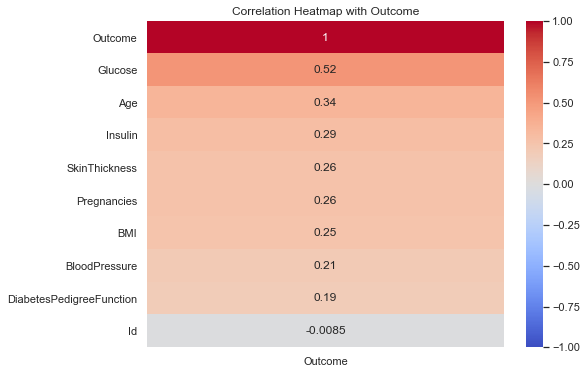

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_2.corr()[['Outcome']].sort_values(by='Outcome', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Outcome')
plt.show()

Looking at the correlations of the current variables we see that the top 3 highest correlates are:

- Glucose: highest correlation at 0.51
- Age : 2nd highest correlation at 0.34
- Insulin: 3rd highest correlation at 0.29

## Data Visualization

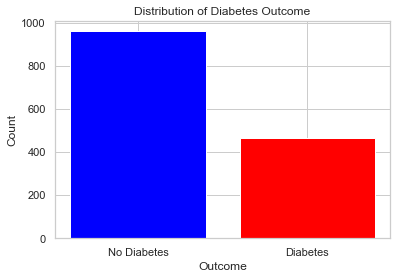

In [18]:
#Plotting visual for target variable

outcome_counts = diabetes_2['Outcome'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'red'])
plt.xticks(outcome_counts.index, ['No Diabetes', 'Diabetes'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Outcome')
plt.show()

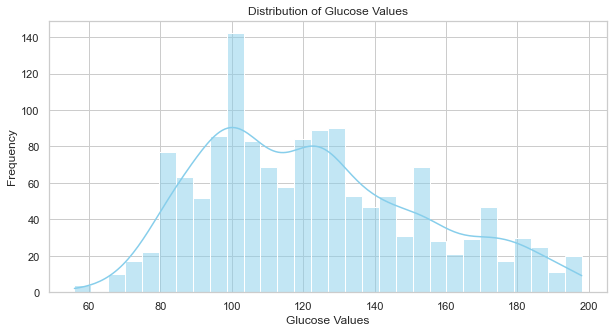

In [17]:
#Plotting a histogram to check the distribution of Glucose Values
#KDE--> Kernal Density Function --> Non-parametric way to estimate probably density function of the data
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 5))
sns.histplot(data= diabetes_2['Glucose'], kde=True, color='skyblue', bins=30)

# Adding title and labels 
plt.title('Distribution of Glucose Values')
plt.xlabel('Glucose Values')
plt.ylabel('Frequency')

plt.show()


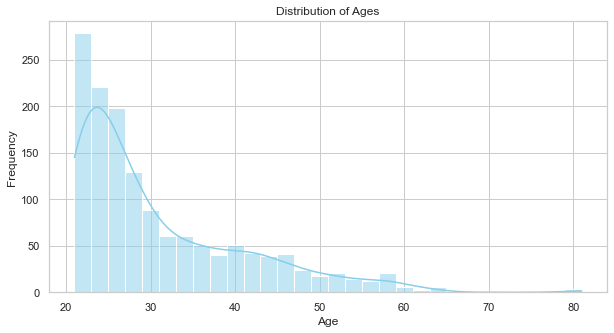

In [20]:
#Plotting a histogram to check the distribution of Ages
#KDE--> Kernal Density Function --> Non-parametric way to estimate probably density function of the data
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 5))
sns.histplot(data= diabetes_2['Age'], kde=True, color='skyblue', bins=30)

# Adding title and labels 
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


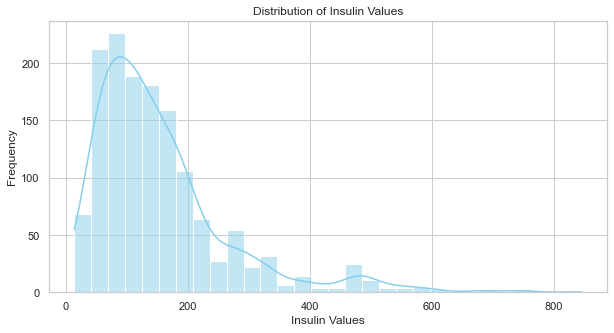

In [21]:
#Plotting a histogram to check the distribution of Insulin Values
#KDE--> Kernal Density Function --> Non-parametric way to estimate probably density function of the data
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 5))
sns.histplot(data= diabetes_2['Insulin'], kde=True, color='skyblue', bins=30)

# Adding title and labels 
plt.title('Distribution of Insulin Values')
plt.xlabel('Insulin Values')
plt.ylabel('Frequency')

plt.show()


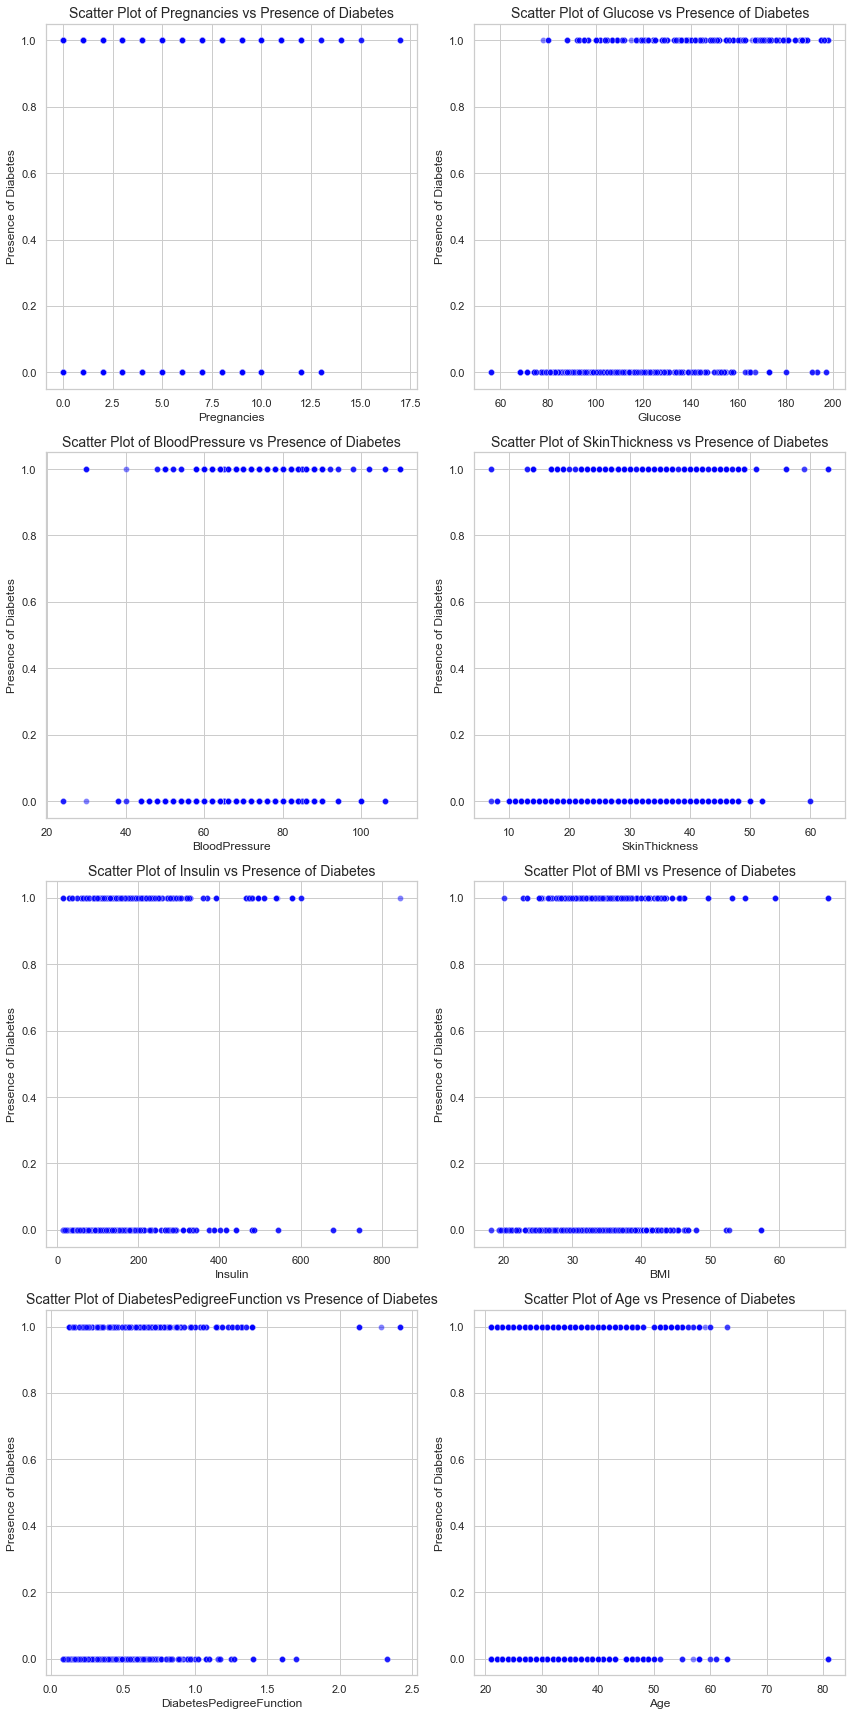

In [23]:
# Plotting scatter plots for these same feature variables. 
dm_predictors = diabetes_2.drop(columns = ['Outcome', 'Id'], axis =1).copy()

num_rows = (len(dm_predictors.columns) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array to easily iterate through the subplots
axes = axes.flatten()

# Looping through each column and create scatter plots
for i, column in enumerate(dm_predictors.columns):
    sns.scatterplot(data=dm_predictors, x=column, y=diabetes_2['Outcome'], ax=axes[i], color='blue', alpha=0.5)
    axes[i].set_title(f"Scatter Plot of {column} vs Presence of Diabetes", fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Presence of Diabetes', fontsize=12)



plt.tight_layout()
plt.show()

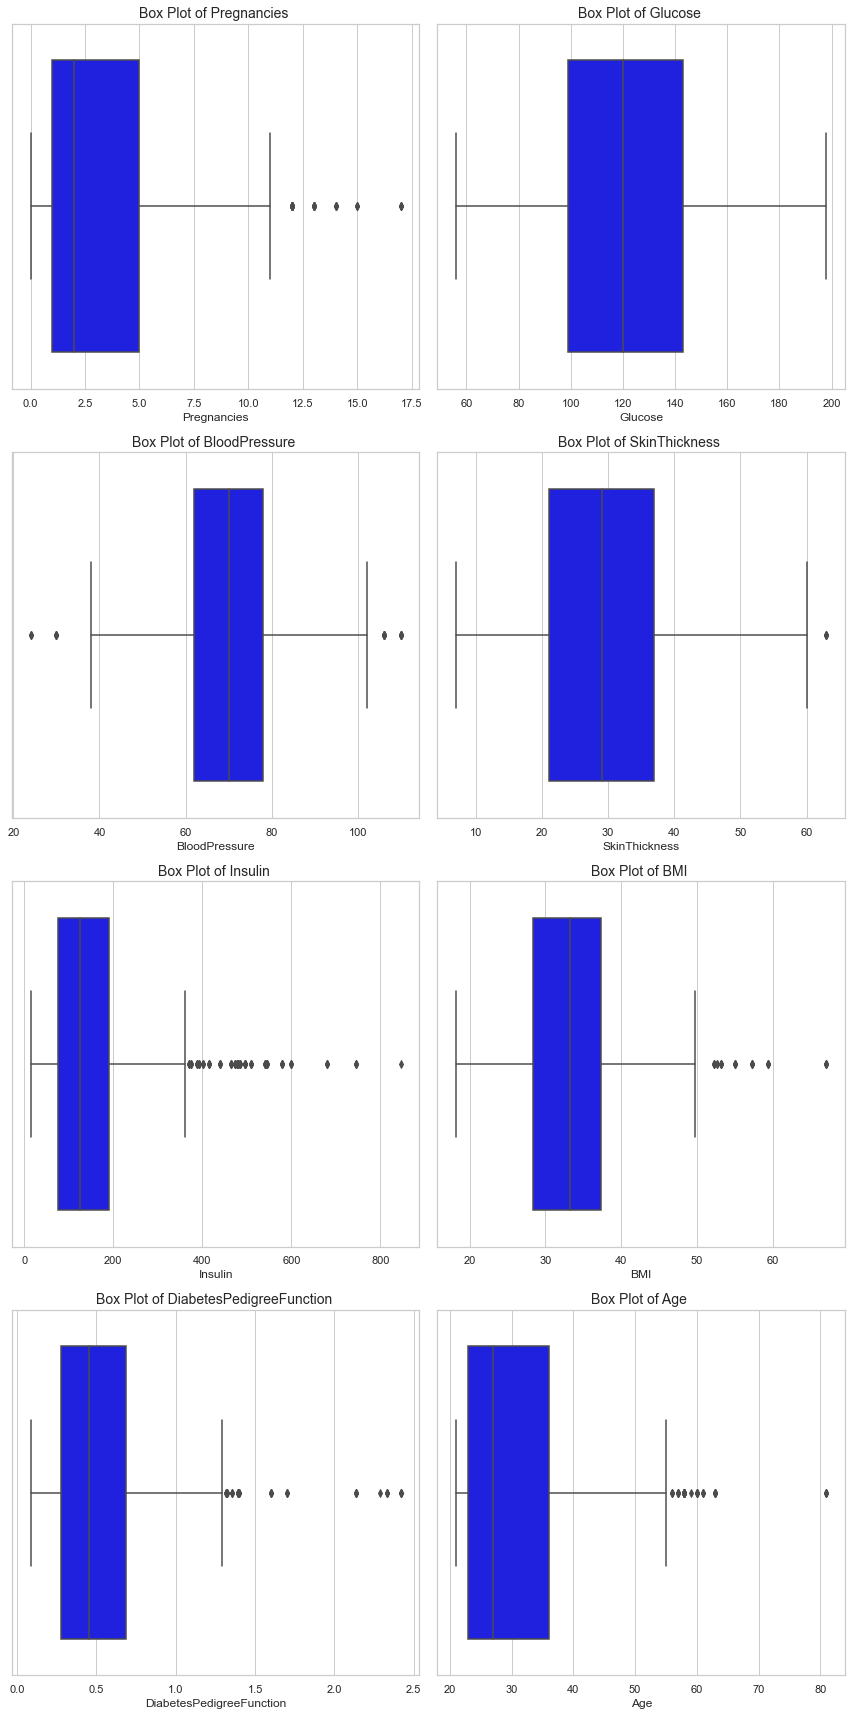

In [25]:
num_rows = (len(dm_predictors.columns) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array to easily iterate through the subplots
axes = axes.flatten()

# Looping through each column and create scatter plots
for i, column in enumerate(dm_predictors.columns):
    sns.boxplot(data=dm_predictors, x=column, ax=axes[i], color='blue')
    axes[i].set_title(f"Box Plot of {column} ", fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
  



plt.tight_layout()
plt.show()

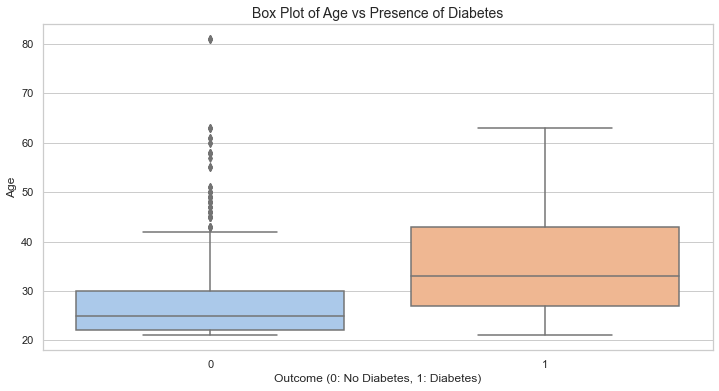

In [26]:
#Box plot of age distribution and presence of diabetes
plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes_2, x='Outcome', y='Age')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Box Plot of Age vs Presence of Diabetes', fontsize=14)
plt.show()

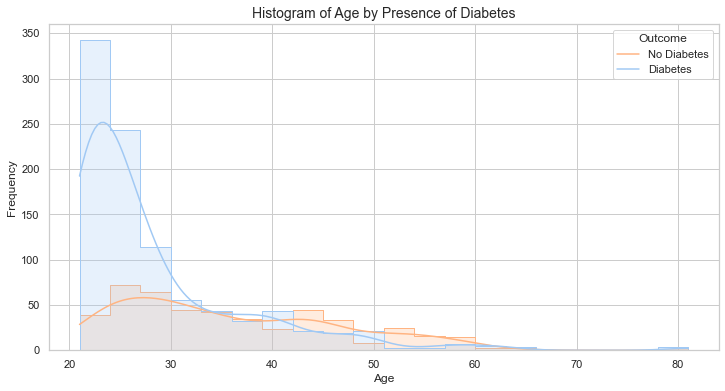

In [27]:
#Histogram of age distribution and presence of diabetes
plt.figure(figsize=(12, 6))
sns.histplot(data=diabetes_2, x='Age', hue='Outcome', kde=True, bins=20, element='step', common_norm=False)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Age by Presence of Diabetes', fontsize=14)
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()

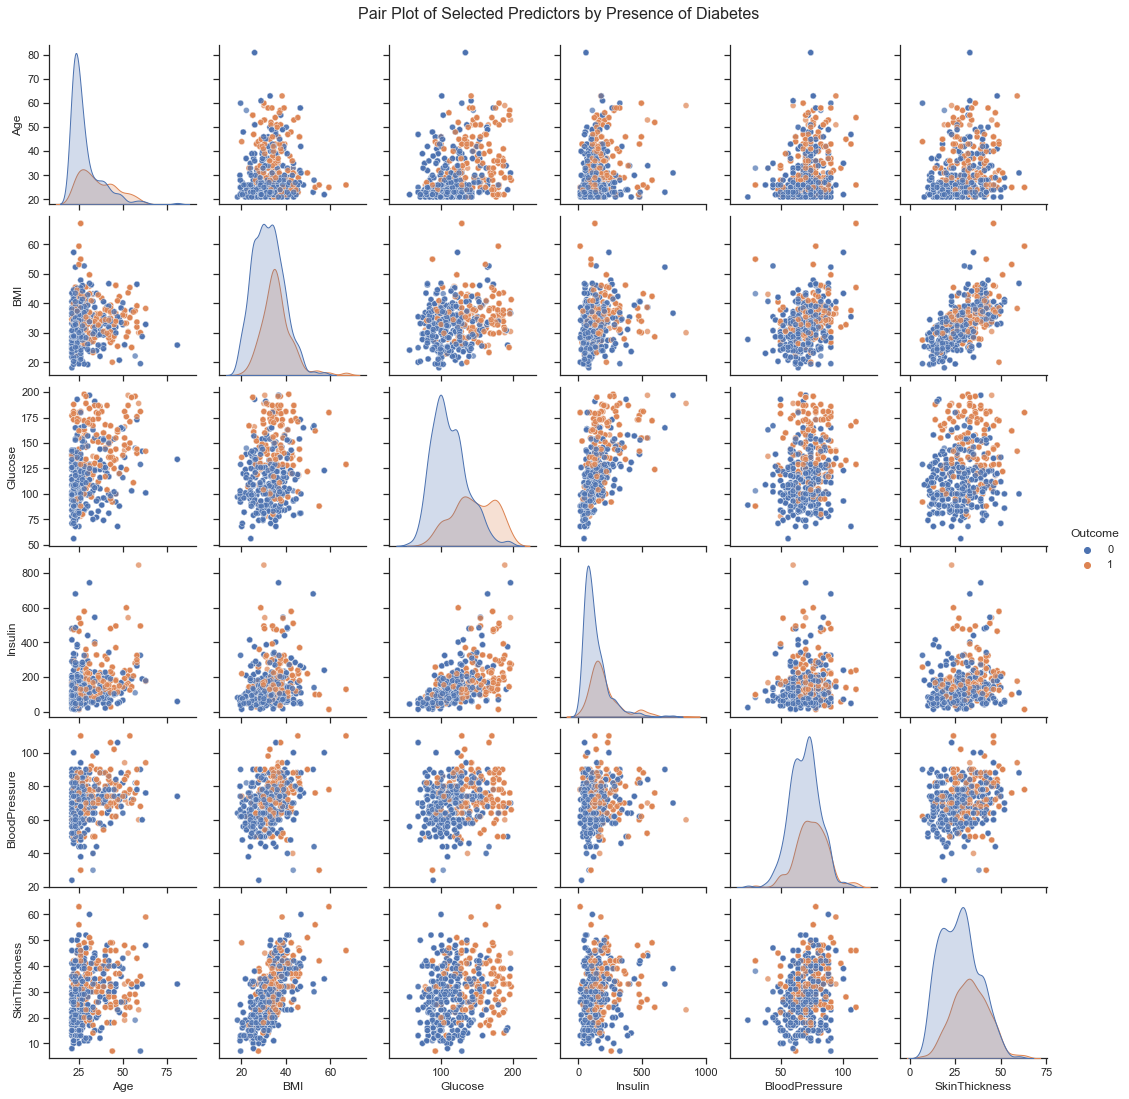

In [28]:
#Pair Plot
selected_predictors = ['Age', 'BMI', 'Glucose', 'Insulin', 'BloodPressure', 'SkinThickness']
sns.set(style="ticks")
sns.pairplot(diabetes_2, hue='Outcome', vars=selected_predictors, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot of Selected Predictors by Presence of Diabetes', fontsize=16, y=1.02)
plt.show()

## Modeling 

## Evaluation

## Conclusion/Recommendations

## Limitations